In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv("D:\\heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [128]:
# percentage of patients having or not having heart disease
A = heart['target'].value_counts()
B = A/heart.shape[0]*100
B

1    54.455446
0    45.544554
Name: target, dtype: float64

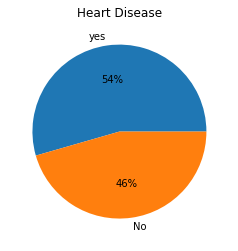

In [129]:
labels = ['yes', 'No']
values = heart['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

In [9]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
# Observations:
# 1. 
#    a. chest pain type (cp) (43%);
#    b. exercise induced angina (exang) (43%);
#    c. induced by exercise relative to rest (oldpeak) (43%);
#    d. the slope of the peak exercise ST segment (slope)  (34%);
#    e. number of major vessels (0-3) colored by flourosopy (ca) (39%);
#    f. thalassemia (thal)(34%) are strongly correlated with the heart disease (target) than others.

# 2.
#    a. age and thalac are strongly correlated. (39%);
#    b. oldpeak and slope are strongly correlated (57%);
#    c. exang and cp are strongly correlated (39%).

# Age exploration:

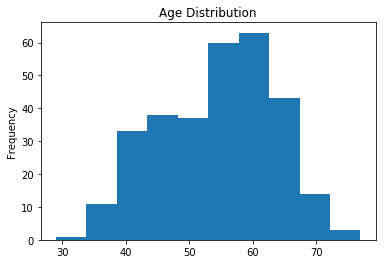

In [11]:
heart['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [86]:
print('Min age: ', min(heart['age']))
print('Max age: ', max(heart['age']))
print('Average age: ', heart['age'].mean())

Min age:  29
Max age:  77
Average age:  54.366336633663366


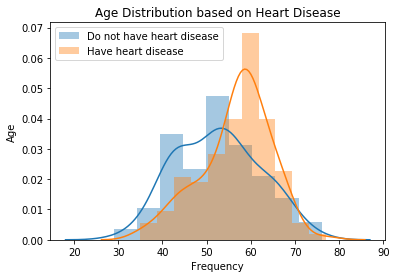

In [87]:
sns.distplot(heart[heart['target'] == 1]['age'], label = 'Do not have heart disease')
sns.distplot(heart[heart['target'] == 0]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [88]:
print('Min age of people who do not have heart disease: ', min(heart[heart['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(heart[heart['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', heart[heart['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.4969696969697


In [89]:
print('Min age of people who have heart disease: ', min(heart[heart['target'] == 0]['age']))
print('Max age of people who have heart disease: ', max(heart[heart['target'] == 0]['age']))
print('Average age of people who have heart disease: ', heart[heart['target'] == 0]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.60144927536232


In [90]:
#Observation: 
# Heart disease infects the old and young people, and probability of the old people to be infected is higher than young people.

In [14]:
print('Average age of people who do not have heart disease: ', heart[heart['target'] == 1]['age'].mean())
print('Average age of people who have heart disease: ', heart[heart['target'] == 0]['age'].mean())

Average age of people who do not have heart disease:  52.4969696969697
Average age of people who have heart disease:  56.60144927536232


# Gender exploration:

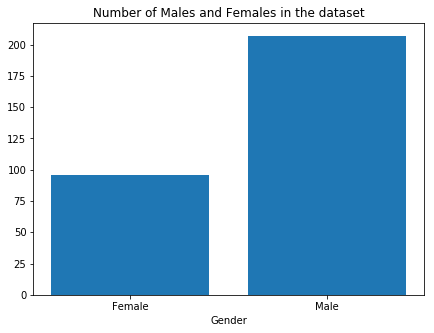

In [15]:
F = heart[heart['sex'] == 0].count()['target']
M = heart[heart['sex'] == 1].count()['target']

figure, ax = plt.subplots(figsize = (7, 5))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

In [16]:
# Observation:
# Clearly, males are more vulnerable to heart disease than females

# Chest pain exploration

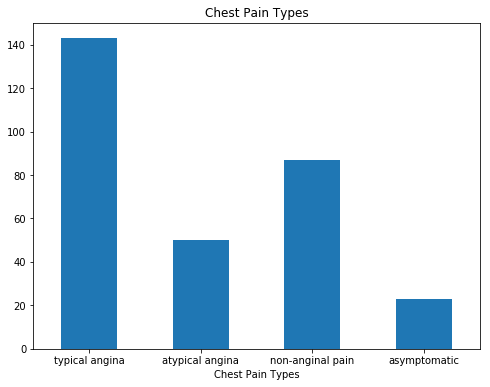

In [17]:
heart.groupby(heart['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

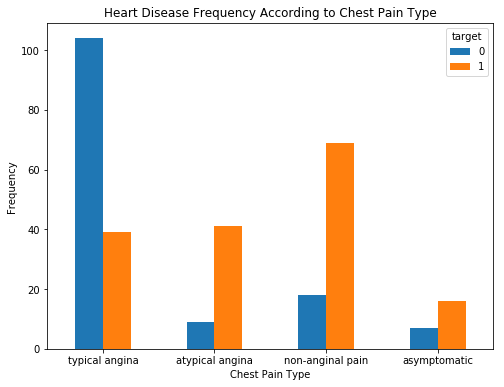

In [24]:
pd.crosstab(heart.cp,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Observation:
# Most of the people with heart disease have typical angina chest pain. Thus, it can be concluded that this is the most vulnerable type of pain.

# Blood pressure exploration

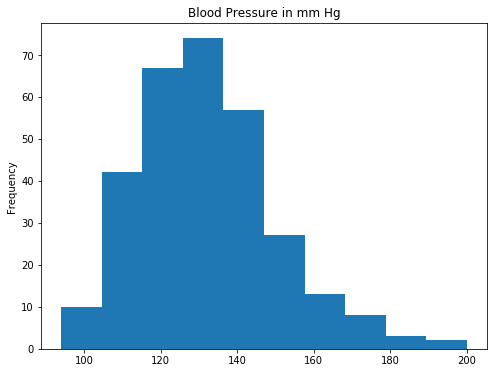

In [25]:
heart['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

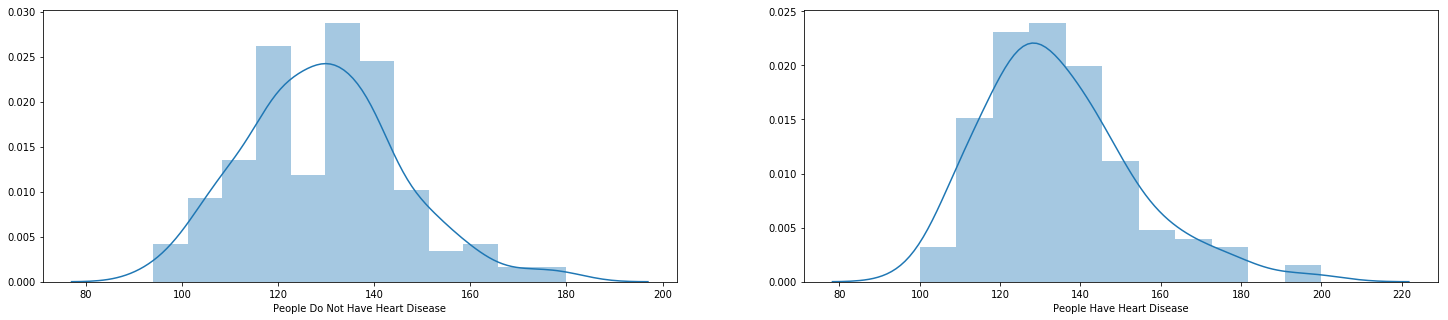

In [91]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 0]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [92]:
print('Min blood pressure of people who do not have heart disease: ', min(heart[heart['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart[heart['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart[heart['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.3030303030303


In [93]:
print('Min blood pressure of people who have heart disease: ', min(heart[heart['target'] == 0]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart[heart['target'] == 0]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart[heart['target'] == 0]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.3985507246377


# Cholestrol Exploration

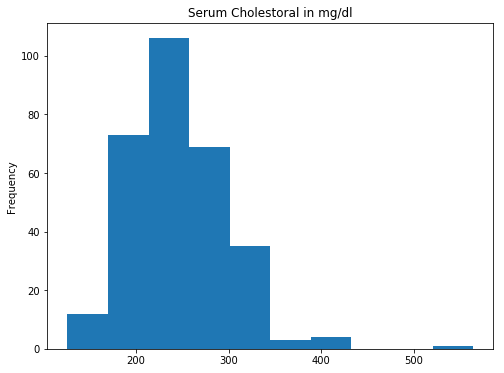

In [94]:
heart['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

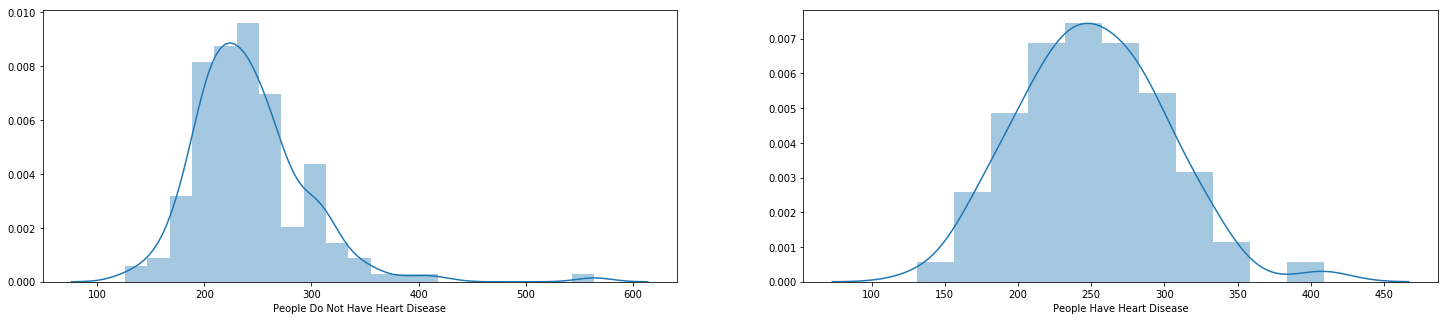

In [95]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 0]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [96]:
print('Min cholestoral of people who do not have heart disease: ', min(heart[heart['target'] == 1]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart[heart['target'] == 1]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart[heart['target'] == 1]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  242.23030303030302


In [97]:
print('Min cholestoral of people who have heart disease: ', min(heart[heart['target'] == 0]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart[heart['target'] == 0]['chol']))
print('Average cholestorale of people who have heart disease: ', heart[heart['target'] == 0]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.08695652173913


# Fasting Blood Sugar Exploration

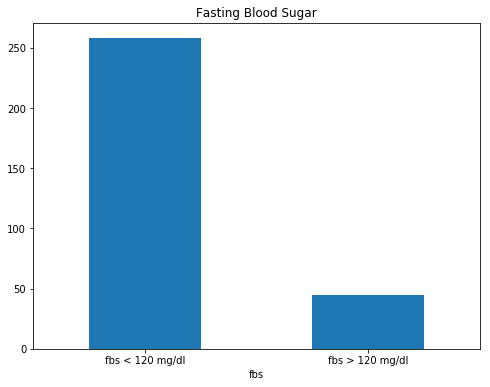

In [98]:
heart.groupby(heart['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

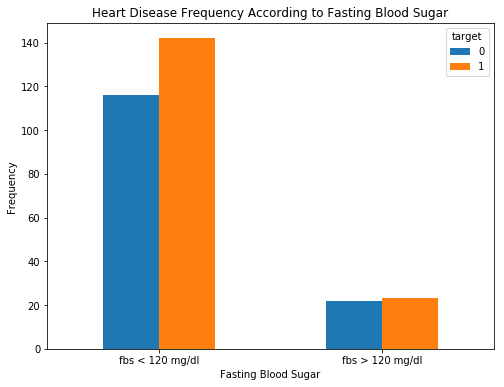

In [99]:
pd.crosstab(heart.fbs,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Electrocardiographic Results Exploration

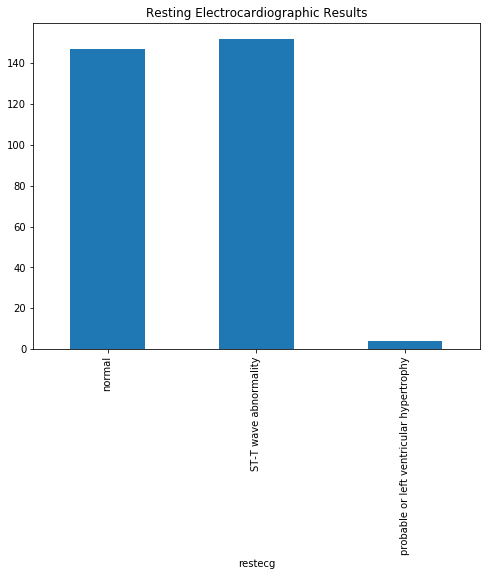

In [43]:
heart.groupby(heart['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

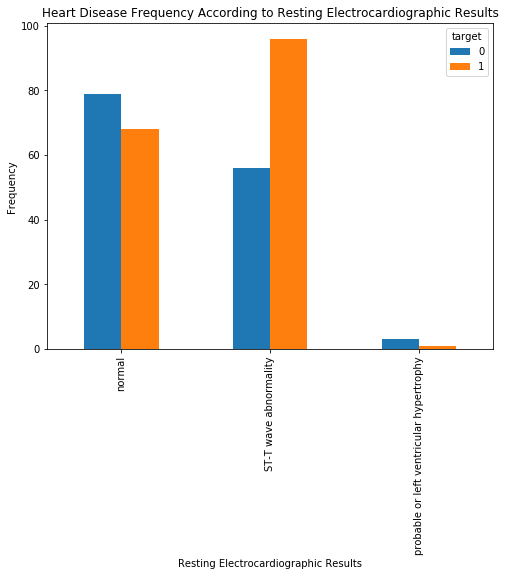

In [45]:
Display resting electrocardiographic results based on the target
pd.crosstab(heart.restecg,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Observation:
# Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.


# Maximum Heart Rate Exploration

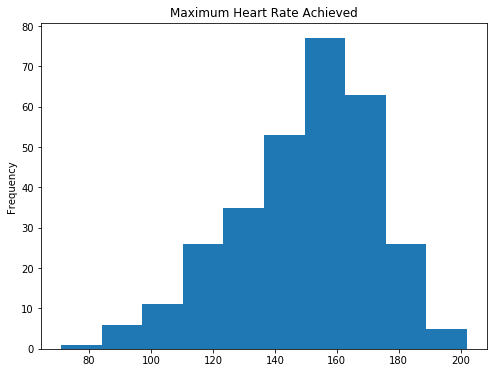

In [48]:
heart['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

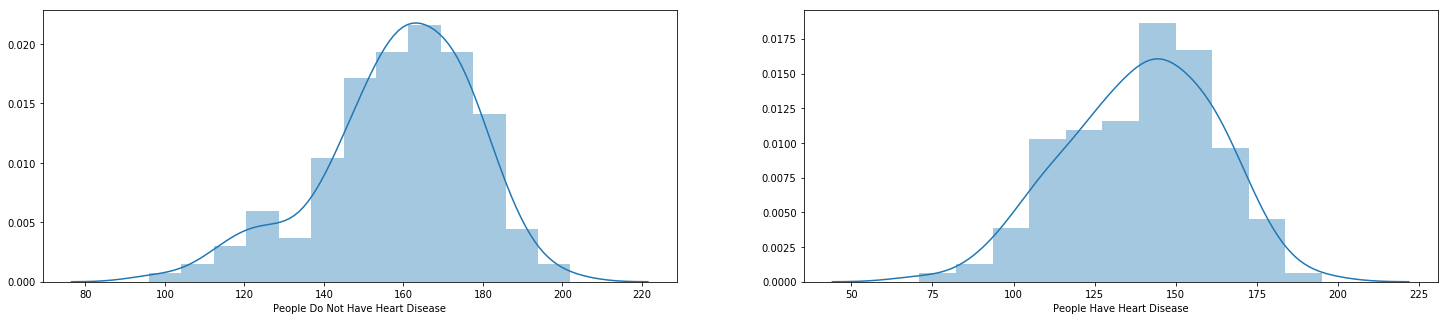

In [51]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 0]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [52]:
print('Min resting blood pressure of people who do not have heart disease: ', min(heart[heart['target'] == 1]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(heart[heart['target'] == 1]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', heart[heart['target'] == 1]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  96
Max resting blood pressure of people who do not have heart disease:  202
Average resting blood pressure of people who do not have heart disease:  158.46666666666667


In [54]:
print('Min maximum heart rate  of people who have heart disease: ', min(heart[heart['target'] == 0]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(heart[heart['target'] == 0]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', heart[heart['target'] == 0]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  71
Max maximum heart rate people who have heart disease:  195
Average maximum heart rate of people who have heart disease:  139.1014492753623


# Excercise induced Angina Exploration

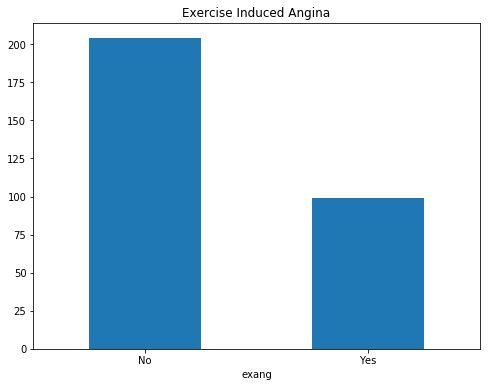

In [56]:
heart.groupby(heart['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

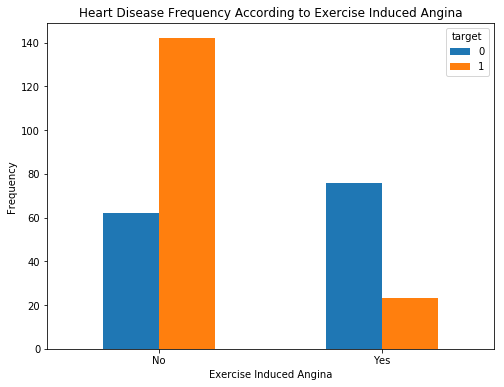

In [58]:
pd.crosstab(heart.exang,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# ST depression Exploration

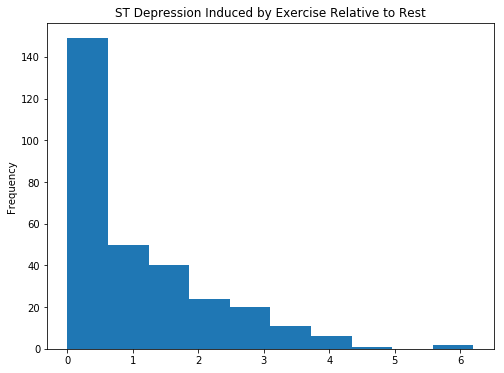

In [60]:
heart['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

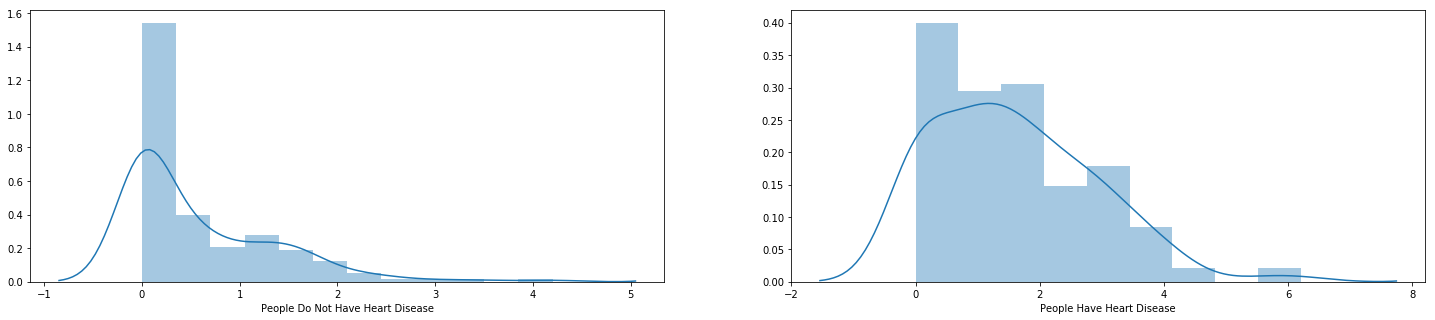

In [62]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart[heart['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart[heart['target'] == 0]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [63]:
print('Min ST depression of people who do not have heart disease: ', min(heart[heart['target'] == 1]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart[heart['target'] == 1]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart[heart['target'] == 1]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.5830303030303029


In [65]:
print('Min ST depression of people who have heart disease: ', min(heart[heart['target'] == 0]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart[heart['target'] == 0]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart[heart['target'] == 0]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.5855072463768118


In [66]:
# Observation:
# The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5

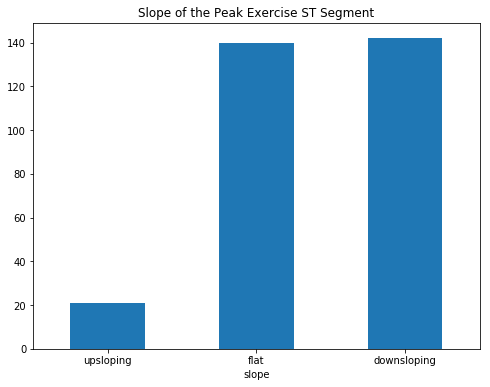

In [67]:
heart.groupby(heart['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

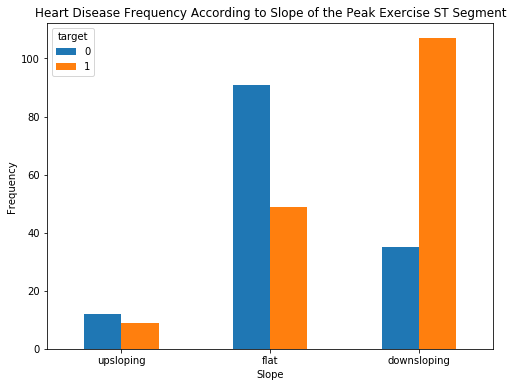

In [68]:
pd.crosstab(heart.slope,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [69]:
# Observation:
# As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.


# Major Vessels Exploration

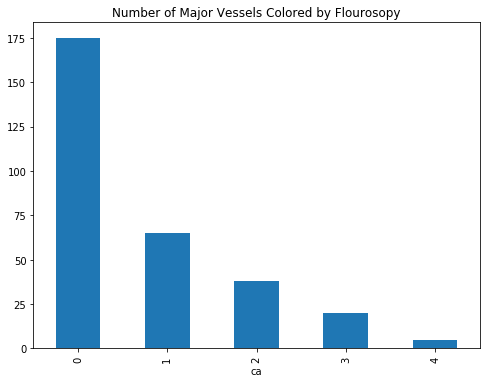

In [70]:
heart.groupby(heart['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

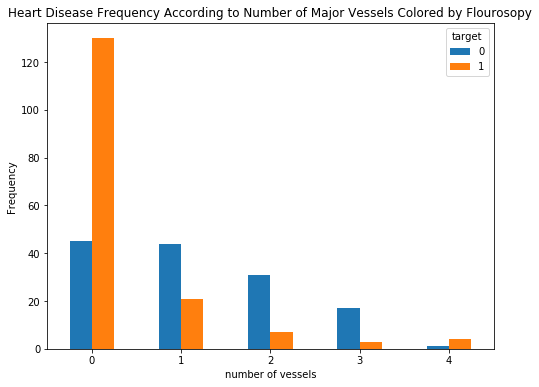

In [71]:
pd.crosstab(heart.ca,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Thalassemia Exploration

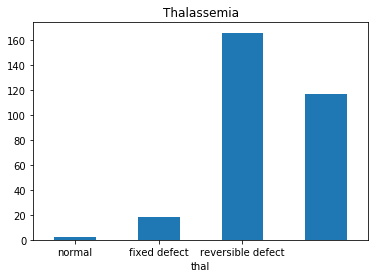

In [72]:
heart.groupby(heart['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

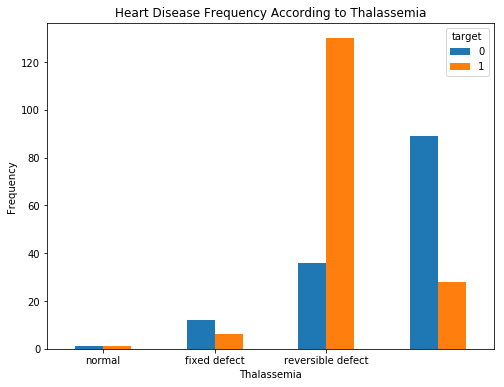

In [73]:
pd.crosstab(heart.thal,heart.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [74]:
# Observation:
# As it is clear, the people with reversible defect are likely to have heart disease.

# The correlation between age and thalach

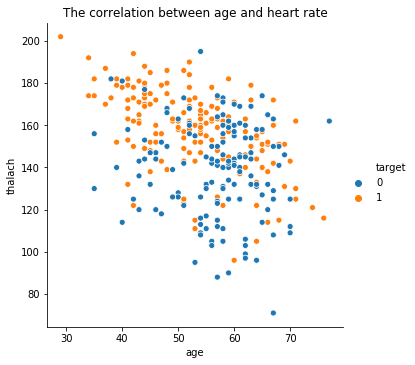

In [130]:
sns.relplot(x = 'age', y = 'thalach', data = heart, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

In [131]:
# Observation:
# The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease.

# The correlation between oldpeak, slope and target

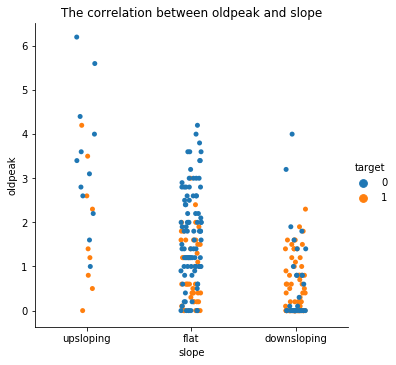

In [132]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = heart)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

In [133]:
# Observation:
# Flat slope and downsloping have higher values of ST depression.

# The correlation between heart disease, cp and exang

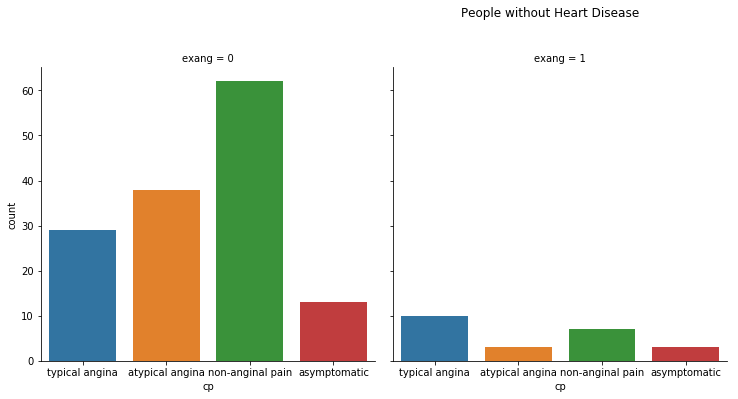

In [76]:
g = sns.catplot("cp", col = "exang", col_wrap = 3, data = heart[heart['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()

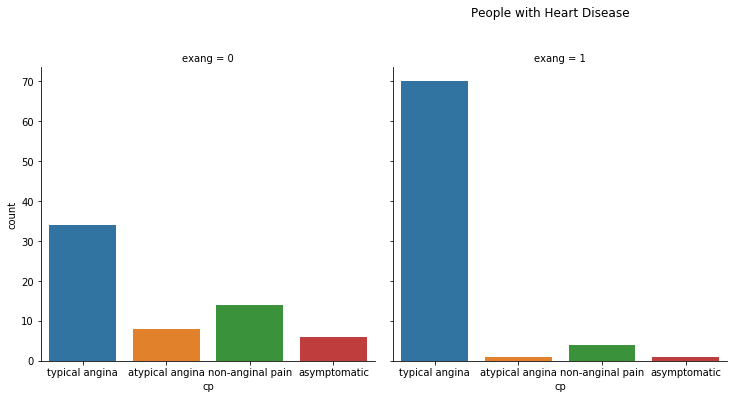

In [77]:
g = sns.catplot("cp", col = "exang", col_wrap = 3, data = heart[heart['target'] == 0], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()

In [79]:
# Observation:
# The people who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.


# MODELLING

In [101]:
target = heart['target']
features = heart.drop(['target'], axis = 1)

In [104]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [105]:
# I will be using following ML algorithms to select the best:
# 1. SVM (support vector machine)
# 2. Random Forest (RF)

In [106]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    results = {}
    model.fit(train_features, y_train)
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [125]:
sv = SVC(random_state = 1, gamma='auto')
rf = RandomForestClassifier(random_state = 1)

# Fit and evaluate models
results = {}
for cls in [sv, rf]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [139]:
for result in results:
    print (result)
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-------------------------------------------------------------------')
    print()

SVC
classification_report :
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.58      1.00      0.73        34

   micro avg       0.59      0.59      0.59        61
   macro avg       0.79      0.54      0.43        61
weighted avg       0.76      0.59      0.47        61


confusion_matrix :
[[ 2 25]
 [ 0 34]]

-------------------------------------------------------------------

RandomForestClassifier
classification_report :
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


confusion_matrix :
[[23  4]
 [ 8 26]]

-------------------------------------------------------------------



In [ ]:
# From the results, the best classifier is RandomForestClassifier